## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II
## Paulo Henrique Vedovatto Turquetti - 13750791

### Dados: 'sneeze1.csv'

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II


### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/PTurquetti/P2_ModelosRegressao2/main/sneeze1.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [93]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')

In [94]:
df.dtypes

nsneeze       int64
alcohol       int64
antihist      int64
smoker        int64
age         float64
pollen      float64
dtype: object

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1200 non-null   int64  
 1   alcohol   1200 non-null   int64  
 2   antihist  1200 non-null   int64  
 3   smoker    1200 non-null   int64  
 4   age       1200 non-null   float64
 5   pollen    1200 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 56.4 KB



**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': "BOXPLOT DE 'NSNEEZE'"}, xlabel='nsneeze'>

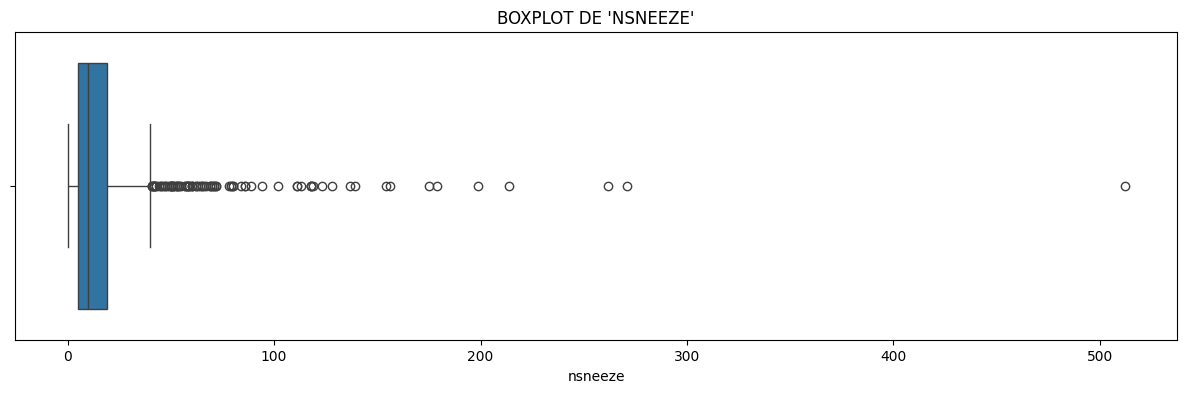

In [97]:
#ANALISANDO VARIÁVEL 'NSNEEZE'
plt.figure(figsize=(15, 4))
plt.title("Boxplot de 'nsneeze'".upper())
sns.boxplot(data=df['nsneeze'], orient='h')

<Axes: >

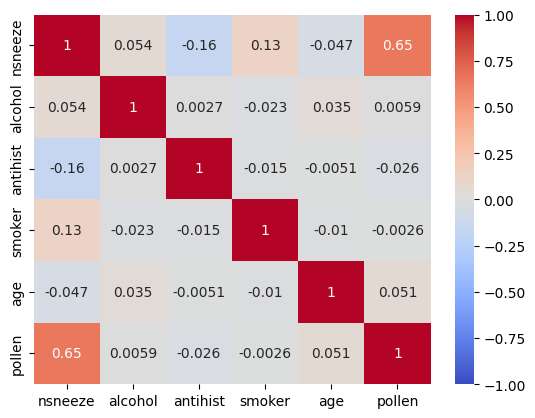

In [98]:
# ANÁLISE DE CORRELAÇÕES ENTRE VIRIÁVEIS E 'NSNEEZE'
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", vmin = -1, vmax = 1, annot = True)

Analisando as correlações, vemos que o único valor de correlação significativa ocorre entre as variáveis 'nsneeze' e 'pollen', com o valor de 0.65, indicando que quando 'pollen' aumenta, 'nsneeze' tende a aumentar também.

As outras variáveis não apresentaram correlação significativa, indicando que não existe uma relação linear clara entre elas

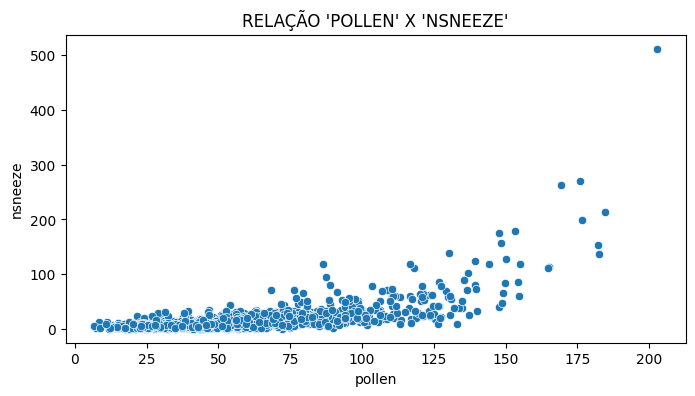

In [99]:
#ANALISANDO RELAÇÃO ENTRE NSNEEZE' E 'POLLEN'
plt.figure(figsize=(8, 4))
plt.title(f"relação 'pollen' x 'nsneeze'".upper())
sns.scatterplot(x=df['pollen'], y=df['nsneeze'])
plt.show()
    

In [100]:
binarias = ['alcohol', 'antihist', 'smoker']

AGRUPANDO DADOS DE ACORDO COM VARIÁVEIS BINÁRIAS E ANALIZANDO VALORES DE "NSNEEZE"

Agrupamento por alcohol


,count,mean,std,min,25%,50%,75%,max
alcohol,,,,,,,,
0,841.0,16.122473,27.928659,0.0,5.0,10.0,18.0,512.0
1,359.0,19.367688,26.496730,0.0,6.0,11.0,22.0,271.0


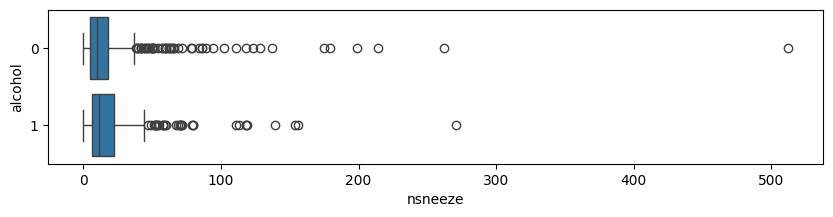

Agrupamento por antihist


,count,mean,std,min,25%,50%,75%,max
antihist,,,,,,,,
0,898.0,19.668151,30.541693,0.0,7.0,12.0,22.0,512.0
1,302.0,9.437086,12.736573,0.0,3.0,6.0,11.0,113.0


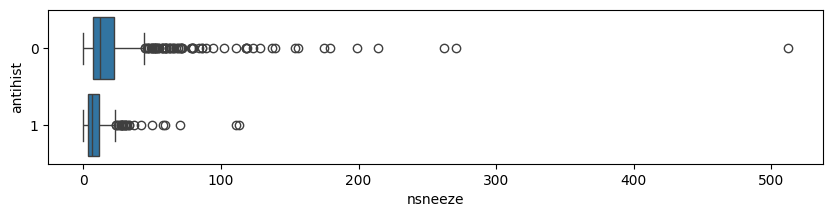

Agrupamento por smoker


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,973.0,15.359712,26.906906,0.0,5.0,9.0,17.0,512.0
1,227.0,24.524229,28.997453,0.0,8.0,15.0,28.0,199.0


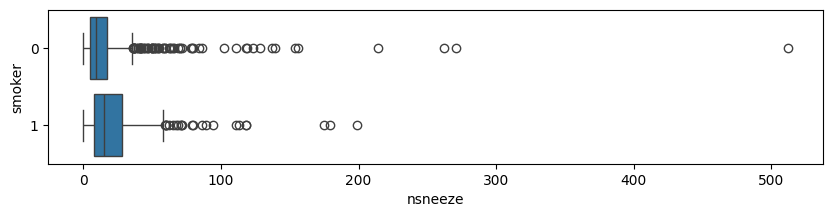

In [101]:
#ANALISANDO RELAÇÃO ENTRE VARIÁVEIS BINÁRIAS E 'NSNEEZE'
print('Agrupando dados de acordo com variáveis binárias e analizando valores de "nsneeze"\n'.upper())
for var in binarias:
    print(f"Agrupamento por {var}")
    display(df.groupby(var)["nsneeze"].describe())
    plt.figure(figsize=(10, 2))
    sns.boxplot(data=df, x='nsneeze', y=var, orient='h')
    plt.show()

 - **Consumo de álcool (alcohol)**
A comparação entre indivíduos que consumiram e que não consumiram bebidas alcoólicas nas 24 horas anteriores mostrou uma diferença moderada no número de espirros. A média de espirros foi ligeiramente maior entre os consumidores de álcool, embora a dispersão das observações tenha sido semelhante entre os grupos. Esse resultado sugere uma possível relação entre consumo de álcool e aumento de espirros, porém de magnitude relativamente pequena.

 - **Uso de anti-histamínicos (antihist)**
O uso de anti-histamínicos apresentou um efeito claro e consistente sobre a redução do número de espirros. Indivíduos que utilizaram o medicamento tiveram, em média, cerca de metade dos espirros observados em relação aos que não utilizaram, além de apresentarem menor variabilidade. Isso indica que o anti-histamínico atua como um fator protetor importante contra episódios de espirros, o que está alinhado com seu efeito farmacológico esperado.

 - **Tabagismo (smoker)**
O tabagismo mostrou uma associação forte e positiva com o aumento no número de espirros. Fumantes apresentaram valores médios e medianos consideravelmente maiores quando comparados aos não fumantes, o que sugere que o hábito de fumar contribui de maneira relevante para maior irritação das vias respiratórias e, consequentemente, mais episódios de espirros.

In [102]:
#ANALISANDO RELAÇÃO ENTRE 'NSNEEZE' E 'AGE'
bins = [0, 20, 40, 60, 120]
labels = ["0-20", "21-40", "41-60", "61+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)
df.groupby("age_group")["nsneeze"].describe()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15868\4016675896.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["nsneeze"].describe()


,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
0-20,101.0,18.524752,30.772908,0.0,7.0,12.0,21.0,271.0
21-40,515.0,18.166990,31.032606,0.0,6.0,11.0,19.0,512.0
41-60,489.0,16.220859,23.063532,0.0,5.0,10.0,19.0,214.0
61+,95.0,14.242105,24.836793,0.0,3.0,7.0,16.0,199.0


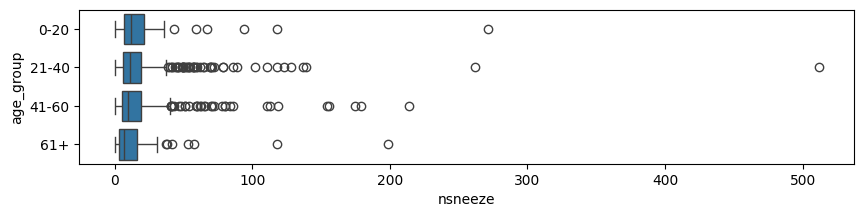

In [103]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, y="age_group", x="nsneeze", orient='h')
plt.show()

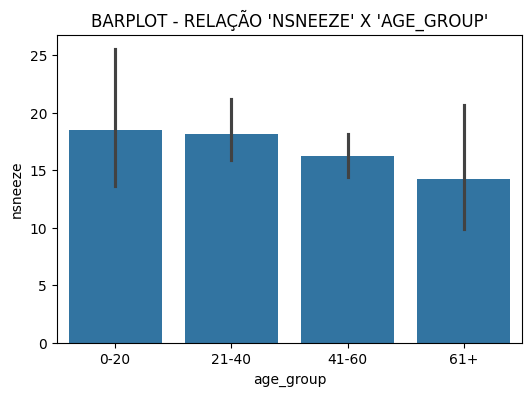

In [104]:
plt.figure(figsize=(6, 4))
plt.title("barplot - relação 'nsneeze' x 'age_group'".upper())
sns.barplot(x="age_group", y="nsneeze", data=df)
plt.show()

Analisando a relação entre a idade, podemos identificar uma relação que indica uma diminuição do número de espirros com o aumento da idade, algo que me surpreendeu. Apesar dessa relação ser suave, ela está presente nos dados

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [105]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [106]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [107]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Sun, 30 Nov 2025   Deviance:                       4949.1
Time:                        20:36:27   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

In [108]:
#INTERPRETAÇÕES AQUI


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [109]:
# PRIMEIRO MÉTODO: ESTATÍSTICA DE DISPERSÃO
deviance = ajuste_pois.deviance
df_resid = ajuste_pois.df_resid

phi_deviance = deviance / df_resid
print("Estatística de dispersão (deviance / graus de liberdade) =".upper(),f'{phi_deviance:.2f}')


ESTATÍSTICA DE DISPERSÃO (DEVIANCE / GRAUS DE LIBERDADE) = 4.14


Quando calculamos a **ESTATÍSTICA DE DISPERSÃO**, analisamos o valor obtido segindo os critérios:

 - Se φ > 1, há superdispersão.
 - Se φ < 1, há subdispersão.

Como o valor obtido para nosso modelo poisson foi **4.14 > 1**, isso indica a existência de **superdispersão**. Isso significa que os dados têm mais variação do que o modelo de Poisson consegue explicar, tornando o modelo de poisson inadequado para os dados analisados

In [117]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, '.', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

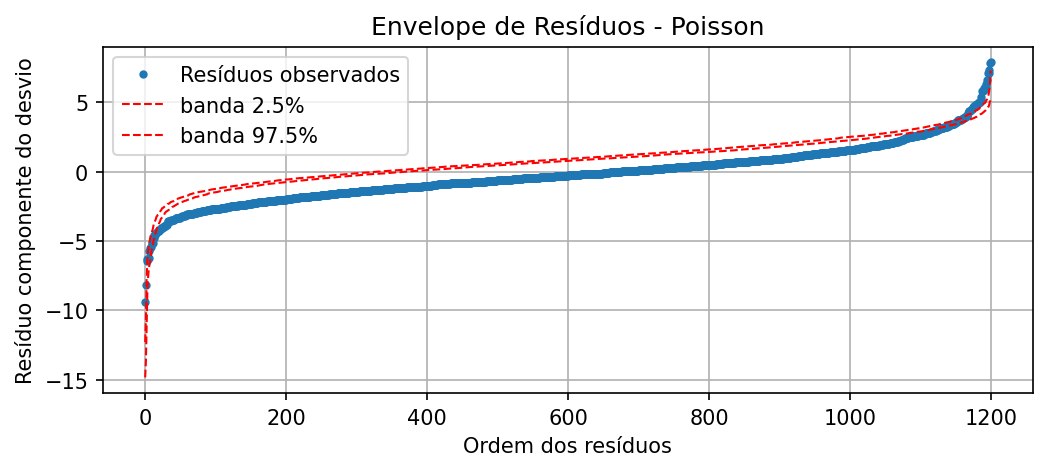

In [118]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [112]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3847.2
Date:                Sun, 30 Nov 2025   Deviance:                       1288.8
Time:                        20:36:28   Pearson chi2:                 1.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5615      0.059  



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [113]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


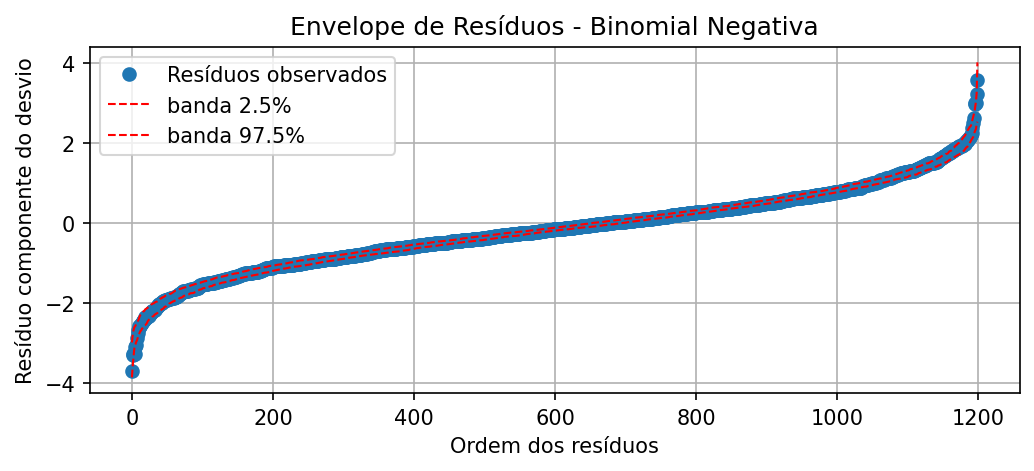

In [114]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.